In [1]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


In [2]:
# Cargar y preparar datos
print("Cargando datos...")
file_path = r"C:\xampp_php5\htdocs\php5\py\r\StudentsPerformance.csv"
datos = pd.read_csv(file_path)
X = datos[['género', 'raza/etnicidad', 'nivel de educación de los padres', 'almuerzo', 'curso de preparación para el examen']]
y = datos[['calificación de matemáticas', 'calificación de lectura', 'calificación de escritura']]
X = pd.get_dummies(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)
print("Datos cargados y escalados con éxito.")

Cargando datos...
Datos cargados y escalados con éxito.


In [3]:
# Inicializar la interfaz gráfica de Tkinter
root = tk.Tk()
root.title("Predicción de Calificaciones con Entrenamiento en Vivo")
root.geometry("600x500")

''

In [4]:
# Variables para los inputs
genero_var = tk.StringVar()
raza_var = tk.StringVar()
educacion_var = tk.StringVar()
almuerzo_var = tk.StringVar()
preparacion_var = tk.StringVar()

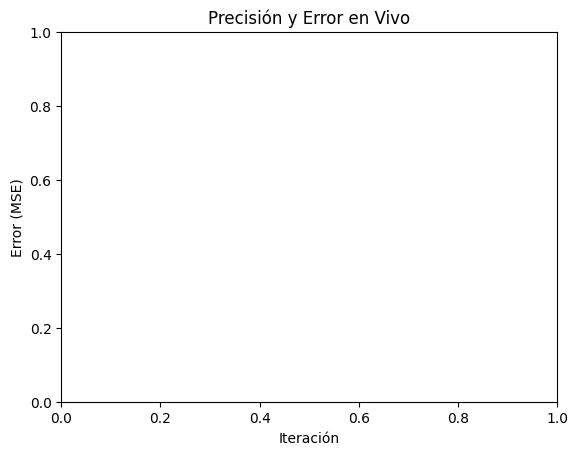

In [5]:
# Crear un contenedor para el gráfico de matplotlib en tkinter
fig, ax = plt.subplots()
ax.set_title("Precisión y Error en Vivo")
ax.set_xlabel("Iteración")
ax.set_ylabel("Error (MSE)")
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

In [6]:
# Función de entrenamiento optimizada
def entrenar_modelo():
    global model
    iteraciones, errores = [], []
    threshold_error = 0.05  # Umbral de error que corresponde a ~95% de precisión
    max_iter = 1000  # Máximo de iteraciones
    print("Iniciando entrenamiento...")

    # Inicializar el modelo de red neuronal
    model = MLPRegressor(hidden_layer_sizes=(2, 3), max_iter=1, warm_start=True, random_state=0)
    
    # Entrenar iterativamente hasta alcanzar el umbral de error
    for i in range(1, max_iter + 1):
        model.fit(X, y_scaled)
        pred_scaled = model.predict(X)
        mse = mean_squared_error(y_scaled, pred_scaled)
        print(f"Iteración {i}: Error cuadrático medio (MSE) = {mse:.5f}")

        # Guardar el error para el gráfico
        iteraciones.append(i)
        errores.append(mse)
        
        # Actualizar gráfico en tiempo real
        ax.clear()
        ax.plot(iteraciones, errores, label="Error (MSE)", color="blue")
        ax.axhline(y=threshold_error, color="red", linestyle="--", label="Umbral de Precisión Deseada")
        ax.legend()
        canvas.draw()
        root.update_idletasks()  # Refrescar la interfaz de Tkinter

        # Verificar si se ha alcanzado el umbral de precisión deseada
        if mse <= threshold_error:
            print(f"Objetivo alcanzado en iteración {i} con MSE de {mse:.5f}")
            break
    print("Entrenamiento completado.")

In [7]:
# Función para hacer la predicción
def predecir():
    print("Preparando datos de entrada para predicción...")
    input_data = pd.DataFrame([[genero_var.get(), raza_var.get(), educacion_var.get(), almuerzo_var.get(), preparacion_var.get()]],
                              columns=['género', 'raza/etnicidad', 'nivel de educación de los padres', 'almuerzo', 'curso de preparación para el examen'])
    input_data = pd.get_dummies(input_data).reindex(columns=X.columns, fill_value=0)
    print("Datos preparados.")

    # Realizar la predicción
    print("Realizando predicción...")
    pred_scaled = model.predict(input_data)
    pred_unscaled = scaler_y.inverse_transform(pred_scaled)
    
    # Mostrar resultados en un cuadro de diálogo
    print(f"Resultado de la predicción:\n"
          f"Calificación de Matemáticas: {pred_unscaled[0][0]:.2f}\n"
          f"Calificación de Lectura: {pred_unscaled[0][1]:.2f}\n"
          f"Calificación de Escritura: {pred_unscaled[0][2]:.2f}")
    
    messagebox.showinfo("Predicción", 
                        f"Calificación de Matemáticas: {pred_unscaled[0][0]:.2f}\n"
                        f"Calificación de Lectura: {pred_unscaled[0][1]:.2f}\n"
                        f"Calificación de Escritura: {pred_unscaled[0][2]:.2f}")


In [8]:
# Crear los campos y etiquetas en la interfaz
tk.Label(root, text="Género (male/female):").pack()
tk.Entry(root, textvariable=genero_var).pack()

tk.Label(root, text="Raza/etnicidad (group A, B, C, D, E):").pack()
tk.Entry(root, textvariable=raza_var).pack()

tk.Label(root, text="Nivel de educación de los padres:").pack()
tk.Entry(root, textvariable=educacion_var).pack()

tk.Label(root, text="Almuerzo (standard/free/reduced):").pack()
tk.Entry(root, textvariable=almuerzo_var).pack()

tk.Label(root, text="Curso de preparación para el examen (completed/none):").pack()
tk.Entry(root, textvariable=preparacion_var).pack()

# Botón para iniciar el entrenamiento y otro para realizar la predicción
tk.Button(root, text="Entrenar hasta 95% Precisión", command=entrenar_modelo).pack()
tk.Button(root, text="Predecir", command=predecir).pack()

# Iniciar el loop de la interfaz
root.mainloop()
